## Coined quantum walk on a hypercube

In [1]:
import hiperwalk as hpw
import numpy as np

### Defining the graph and the QW instance

The next command creates a hypercube with name 'cube', which is an instance of the Graph class. The dimension of the hypercube in 'n'.

In [2]:
n = 3
cube = hpw.Hypercube(n)

The next command creates a QW on the hypercube, which is an instance of the Coined class.

In [3]:
qw = hpw.Coined(cube)

### Setting the initial state in the center

There are many equivalent ways (two of them are described below) to define the initial state: 

$$\sum_{v\in N(0)}\frac{|(0,v)\rangle}{\sqrt{n}},$$

where $N(0)$ is the neighborhood of vertex 0. Note that the computational basis is comprised of arcs. This initial state is equivalent to a uniform superposition of the coin state when the walker is on vertex $0$. The easiest way of creating this initial state is using the 'uniform_state' method. The input is a list of vertices.

In [4]:
ini_state = qw.uniform_state([0])
print(ini_state)

[0.57735027 0.57735027 0.57735027 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


There is an alternate way to create the same initial state. First, let us check which are the neighbors of vertex 0.

In [5]:
cube.neighbors(0)

array([1, 2, 4], dtype=int32)

The vertices of the hypercube range from 0 to $2^n - 1$. The neighbors of vertex 0 are 1, 2, 4, 8, etc., because they have a Hamming distance of one from vertex 0. An arbitrary state can be created with the 'state' method by inputting a list of (amplitude, arc) pairs. The notation for an arc is (tail, head), where both tail and head are vertices. The arcs with a tail of 0 include (0,1), (0,2), (0,4), and so on. This method creates the equivalent initial state.

In [6]:
ini_state = qw.state([(1/np.sqrt(n), (0,2**i)) for i in range(n)])
print(ini_state)

[0.57735027 0.57735027 0.57735027 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


### Probability distribution over the hypercube graph

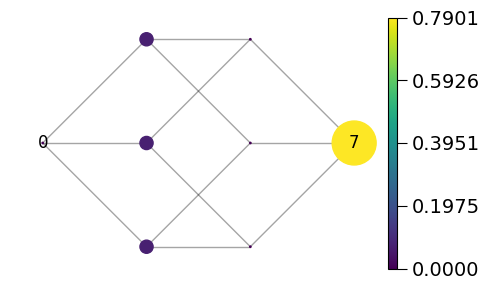

In [7]:
final_state = qw.simulate(range = (n,n+1), state = ini_state)
probs = qw.probability_distribution(final_state)
hpw.plot_probability_distribution(probs, graph=cube, figsize=(5,3))

### Histogram of the probability distribution

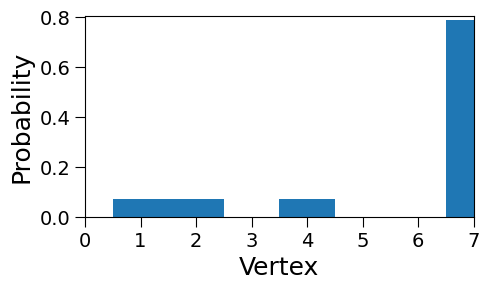

In [8]:
hpw.plot_probability_distribution(probs, plot='histogram', figsize=(5,3))

### Animation of the quantum walk

In [9]:
list_of_states = qw.simulate(range = (0,n+1), state = ini_state)
list_of_probs = qw.probability_distribution(list_of_states)
hpw.plot_probability_distribution(list_of_probs, graph=cube, animate=True, figsize=(6,3))